# 📊 Detecting and Treating Outliers

This notebook demonstrates various ways to **detect** and **treat** outliers using different methods and datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 💼 Dataset 1: Salary (detect with IQR, treat by removal)

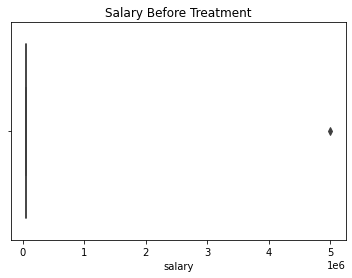

In [2]:
salaries = pd.DataFrame({'salary': [50000, 52000, 51000, 53000, 5000000, 49000, 51000, 51500, 50500]})

# Boxplot before
sns.boxplot(x=salaries['salary'])
plt.title("Salary Before Treatment")
plt.show()

   salary
0   50000
1   52000
2   51000
3   53000
5   49000
6   51000
7   51500
8   50500


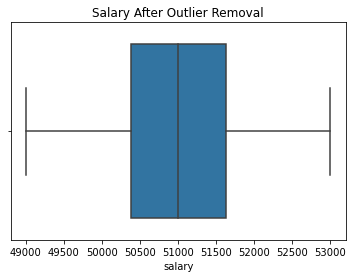

In [9]:
# Detect and remove outliers using IQR
Q1 = salaries['salary'].quantile(0.25)
Q3 = salaries['salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

salaries_clean = salaries[(salaries['salary'] >= lower) & (salaries['salary'] <= upper)]
print(salaries_clean)
# Boxplot after outlier removal
sns.boxplot(x=salaries_clean['salary'])
plt.title("Salary After Outlier Removal")
plt.show()

## 👶 Dataset 2: Age (detect with percentiles, treat by winsorization)

In [4]:
ages = pd.DataFrame({'age': [22, 23, 21, 24, 22, 120, 23, 24, 21, 100]})

# Detect extreme values using percentiles
p01 = ages['age'].quantile(0.01)
p99 = ages['age'].quantile(0.99)

# Winsorization (capping)
ages['age_capped'] = ages['age'].clip(lower=p01, upper=p99)
ages

,age,age_capped
0,22,22.0
1,23,23.0
2,21,21.0
3,24,24.0
4,22,22.0
5,120,118.2
6,23,23.0
7,24,24.0
8,21,21.0
9,100,100.0


## 💰 Dataset 3: Income (treat with log transform)

   income  log_income
0   30000   10.308986
1   35000   10.463132
2   40000   10.596660
3  100000   11.512935
4  250000   12.429220
5  500000   13.122365


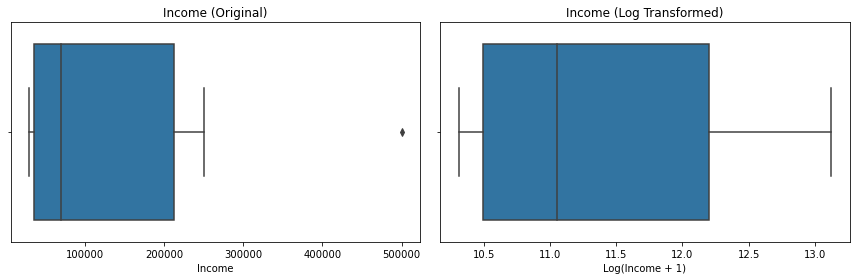

In [12]:
income = pd.DataFrame({'income': [30000, 35000, 40000, 100000, 250000, 500000]})
income['log_income'] = np.log1p(income['income'])
print(income)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot original income (boxplot)
sns.boxplot(x=income['income'], ax=axes[0])
axes[0].set_title('Income (Original)')
axes[0].set_xlabel('Income')

# Plot log-transformed income (boxplot)
sns.boxplot(x=income['log_income'], ax=axes[1])
axes[1].set_title('Income (Log Transformed)')
axes[1].set_xlabel('Log(Income + 1)')
#sns.histplot(income['income'], bins=10, ax=axes[0], kde=True)
#axes[0].set_title('Income (Original)')
#axes[0].set_xlabel('Income')

# Plot log-transformed income
#sns.histplot(income['log_income'], bins=10, ax=axes[1], kde=True)
#axes[1].set_title('Income (Log Transformed)')
#axes[1].set_xlabel('Log(Income + 1)')

plt.tight_layout()
plt.show()

## 🧪 Dataset 4: Test Scores (flag outliers using z-score)

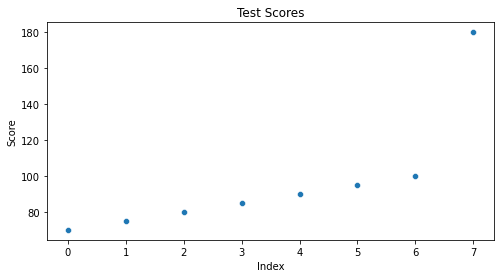

,score,z_score,is_outlier
0,70,-0.819829,False
1,75,-0.667302,False
2,80,-0.514776,False
3,85,-0.362250,False
4,90,-0.209724,False
5,95,-0.057197,False
6,100,0.095329,False
7,180,2.535749,True


In [13]:
scores = pd.DataFrame({'score': [70, 75, 80, 85, 90, 95, 100, 180]})

# Plot the scores with outliers highlighted
plt.figure(figsize=(8, 4))
sns.scatterplot(x=range(len(scores)), y=scores['score'])
plt.title("Test Scores")
plt.xlabel("Index")
plt.ylabel("Score")
plt.show()
scores['z_score'] = stats.zscore(scores['score'])
scores['is_outlier'] = scores['z_score'].abs() > 2
scores